Import packacges.

In [1]:
# %matplotlib notebook

%reload_ext autoreload
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, PolynomialFeatures, scale

%aimport Sherlock
from Sherlock import Sherlock
from RBF import bases
from utils import adrs, read_design_space, approximate_pareto
import dcor

try: import GPy
except: pass

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.ERROR, datefmt='%I:%M:%S')

%autoreload 1

Read the design space.

In [2]:
X, y, _, names, _ = read_design_space('../../final_result_impl_spmv.csv',
                                      use_hint=False, random_factor=0.0, hint_random_factor=0.0,
                                      return_names=True)

Plot the design space.

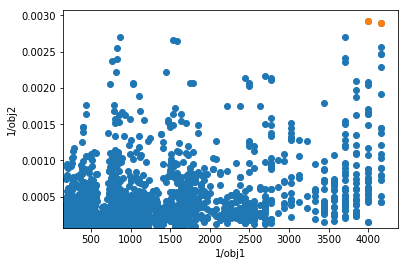

In [3]:
plt.figure()
y_pareto = approximate_pareto(y)[0]
plt.scatter(y[:,0], y[:,1])
plt.scatter(y_pareto[:,0], y_pareto[:,1])
plt.xlabel("1/" + names[-2])
plt.ylabel("1/" + names[-1])
plt.xlim(left=y[:,0].min()*0.95, right=y[:,0].max()*1.05)
plt.ylim(bottom=y[:,1].min()*0.95, top=y[:,1].max()*1.05)
plt.show()

Run Sherlock.

0.0


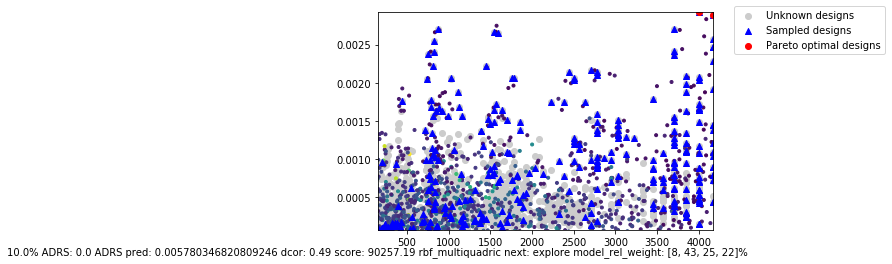

In [4]:
sherlock = Sherlock(
    n_init=5,
    budget=int(X.shape[0]*0.1),
    surrogate_type="rbfthin_plate-rbf_multiquadric-randomforest-gpy", #rbfthin_plate-rbf_multiquadric-randomforest-gpy
    kernel="matern",
    num_restarts=0,
    pareto_margin=0,
    y_hint=None,
    output_stats="", #"adrs,dcor,dcor_energy,entropy,pareto_score,next_action",
    plot_design_space=True,
    use_ted_in_loop=False,
    request_output=lambda y, idx: None,
    action_only=None,
    n_hint_init=0,
    scale_output=True,
    use_trace_as_prior=True,
    model_selection_type="mab10")

sherlock.fit(X).predict(X,y)
err = adrs(y, sherlock.known_idx, approximate=True)
print(err)

In [5]:
sherlock.known_idx

array([ 912, 2596, 1703,  918,  921,  672, 2189,   30,   35,   20,    0,
         40, 2169,    9, 1353,    1,    2,    5, 2144,    4, 2165,  122,
       2110,    6,  120, 2090,  596,  124,  130,  132,    7, 1293,   10,
       2446,   39,   34,    3,  123,  121,  125,  131,  133,  593, 2451,
        135,  142,   41, 2964, 2116,  113, 2755, 2740, 2467,   84,  598,
        597,  283,  601,  140,  134,  126,  127,  136, 1550,  608, 2105,
       2095, 2383,   13, 1330, 2100, 2185,  605, 2159, 1957, 2096,  607,
        286,  128,    8,  456,  617, 1282, 1278,  282,  594,  595,   11,
       1279, 2125, 1281, 1286, 1298,  138, 2115,  129, 1602, 1306,  137,
        454,  139,   15,  146,  161,   45, 1283,  613, 2108, 2094,  599,
        609, 1518, 2093,  288, 1302, 1598, 2114, 2145, 1341, 1358,   46,
        292,   42, 1928, 2190,  293,  143,  141, 2088,  837,  145,  612,
         43,  600,  162, 1521, 1113, 1277, 2083,  604, 1581,  586,  628,
       1313, 1122, 1361,  618,  606,  289,  473, 22